Лабораторная работа № 5: **Деревья решений**<br>
Выполнил: **Стадников Александр, гр.6135**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
sns.set_style("darkgrid")

import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Загрузка датасета

**Исходные данные:** http://archive.ics.uci.edu/ml/datasets/Automobile

**Набор данных:** Набор данных об автомобилях

Этот набор данных состоит из трех типов объектов: (а) спецификация автомобиля с точки зрения различных характеристик, (б) присвоенный ему рейтинг страхового риска, (в) его нормализованные потери при использовании по сравнению с другими автомобилями. Второй рейтинг соответствует тому, насколько автомобиль более рискован, чем указывает его цена. Автомобилям изначально присваивается символ фактора риска, связанный с его ценой. Затем, если это более рискованно (или менее), этот символ корректируется, перемещая его вверх (или вниз) по шкале. Актуарии называют этот процесс «символизацией». Значение +3 указывает на то, что авто рискованно, -3, что это, вероятно, довольно безопасно.

**Столбцы:**

1. **symboling:** фактор риска от -3 до +3.
2. **normalized-losses:** нормализованные потери.
3. **make:** марка автомобиля:
>alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. **fuel-type:** тип топлива: дизель, газ.
5. **aspiration:** турбонаддув: std (стандартный), turbo.
6. **num-of-doors:** кол-во дверей: 2 и 4.
7. **body-style:** тип кузова: хардтоп, универсал, седан, хэтчбек, кабриолет.
8. **drive-wheels:** тип привода: 4wd (полный привод), fwd (передний), rwd (задний).
9. **engine-location:** расположение двигателя: front (спереди), rear (сзади).
10. **wheel-base:** колёсная база: от 86.6 до 120.9.
11. **length:** длина автомобиля: от 141.1 до 208.1.
12. **width:** ширина автомобиля: от 60.3 to 72.3.
13. **height:** высота автомобиля: от 47.8 to 59.8.
14. **curb-weight:** масса автомобиля: от 1488 до 4066.
15. **engine-type:** тип двигателя: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. **num-of-cylinders:** кол-во цилиндров двигателя: eight, five, four, six, three, twelve, two.
17. **engine-size:** размер двигателя: от 61 до 326.
18. **fuel-system:** топливная система: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. **bore:** диаметр поршня: от 2.54 до 3.94.
20. **stroke:** ход поршня: от 2.07 до 4.17.
21. **compression-ratio:** степень сжатия: от 7 до 23.
22. **horsepower:** лошадинные силы от 48 до 288.
23. **peak-rpm:** пиковый крутящий момент от 4150 до 6600 оборотов в минуту.
24. **city-mpg:** расход в городе: от 13 до 49 миль на галон топлива.
25. **highway-mpg:** расход по шоссе: от 16 до 54 миль на галон топлива.
26. **price:** цена автомобиля: от 5118 до 45400 долларов США.

**Полное оригинальное описание датасета:** (на английском)

In [2]:
fp = r"data\imports-85_inf.txt"
with open(fp) as file_handler:
    for line in file_handler:
        print(line)

1. Title: 1985 Auto Imports Database



2. Source Information:

   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

   -- Date: 19 May 1987

   -- Sources:

     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's

        Automotive Yearbook.

     2) Personal Auto Manuals, Insurance Services Office, 160 Water

        Street, New York, NY 10038 

     3) Insurance Collision Report, Insurance Institute for Highway

        Safety, Watergate 600, Washington, DC 20037



3. Past Usage:

   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction

      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},

      51--57.

	 -- Predicted price of car using all numeric and Boolean attributes

	 -- Method: an instance-based learning (IBL) algorithm derived from a

	    localized k-nearest neighbor algorithm.  Compared with a

	    linear regression prediction...so all instances

	    with missing attribute values were

In [3]:
df = pd.read_csv(r"data\imports-85.txt",names=['symboling', 'normalized-losses', 'make', 'fuel-type', 
                                           'aspiration', 'num-of-doors','body-style','drive-wheels',
                                           'engine-location','wheel-base','length','width','height',
                                           'curb-weight','engine-type','num-of-cylinders','engine-size',
                                           'fuel-system','bore','stroke','compression-ratio','horsepower',
                                          'peak-rpm','city-mpg','highway-mpg','price'])

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


# 1. Преобразование категориальных признаков в бинарные
- с помощью pd.factorize / pd.get_dummies

In [4]:
df = df[df[:] != '?'].iloc[:,:] #найдем все пропуски в данных и заменим их на медианное значение
df.fillna(df.median(),inplace = True)

In [5]:
cars_data = df.drop(columns=['make','body-style','drive-wheels',
                            'fuel-system','engine-type'])

In [6]:
cars_data = pd.concat([cars_data,pd.get_dummies(df['make'],drop_first = True)],axis = 1)
cars_data = pd.concat([cars_data,pd.get_dummies(df['body-style'],drop_first = True)],axis = 1)
cars_data = pd.concat([cars_data,pd.get_dummies(df['drive-wheels'],drop_first = True)],axis = 1)
cars_data = pd.concat([cars_data,pd.get_dummies(df['fuel-system'],drop_first = True)],axis = 1)
cars_data = pd.concat([cars_data,pd.get_dummies(df['engine-type'], drop_first = True)],axis = 1)

In [7]:
cars_data['fuel-type'] = pd.factorize(df['fuel-type'])[0]
cars_data['aspiration'] = pd.factorize(df['aspiration'])[0]
cars_data['num-of-doors'] = pd.factorize(df['num-of-doors'])[0]
cars_data['engine-location'] = pd.factorize(df['engine-location'])[0]
cars_data['num-of-cylinders'] = pd.factorize(df['num-of-cylinders'])[0]
cars_data.head(10)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,115,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,115,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,115,0,0,0,0,94.5,171.2,65.5,52.4,2823,1,152,2.68,3.47,9.0,154,5000,19,26,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2,164,0,0,1,0,99.8,176.6,66.2,54.3,2337,0,109,3.19,3.40,10.0,102,5500,24,30,13950,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2,164,0,0,1,0,99.4,176.6,66.4,54.3,2824,2,136,3.19,3.40,8.0,115,5500,18,22,17450,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,2,115,0,0,0,0,99.8,177.3,66.3,53.1,2507,2,136,3.19,3.40,8.5,110,5500,19,25,15250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,1,158,0,0,1,0,105.8,192.7,71.4,55.7,2844,2,136,3.19,3.40,8.5,110,5500,19,25,17710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,1,115,0,0,1,0,105.8,192.7,71.4,55.7,2954,2,136,3.19,3.40,8.5,110,5500,19,25,18920,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,1,158,0,1,1,0,105.8,192.7,71.4,55.9,3086,2,131,3.13,3.40,8.3,140,5500,17,20,23875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9,0,115,0,1,0,0,99.5,178.2,67.9,52.0,3053,2,131,3.13,3.40,7.0,160,5500,16,22,10295,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## 1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализовапнного датасета KNeighborsClassifier

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
features_values = cars_data.drop("num-of-doors",axis = 1)
target_value = cars_data["num-of-doors"]
X_train, X_test, y_train, y_test = train_test_split(features_values, target_value, test_size=0.3, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [11]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
predictions = knn_classifier.predict(X_test_scaled)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

score = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.7197044334975369
Точность на тестовой выборке:  0.7258064516129032


## 1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
pipe_knn = Pipeline([('scaler', StandardScaler()), 
                     ('kNN', KNeighborsClassifier())]
                    )
pipe_knn.fit(X_train, y_train)
predictions = pipe_knn.predict(X_test)

score = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.7194581280788178
Точность на тестовой выборке:  0.7258064516129032


## 1.3. GridSearchCV
С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
grid_params = {
    'n_neighbors': [*range(1, 11, 1)]
}

search = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_params, 
                      scoring=['accuracy'], 
                      n_jobs=-1, 
                      cv=5,
                      verbose=3,
                      refit='accuracy',
                      )
searching_results = search.fit(X_train, y_train)
pridictions = search.predict(X_test)
print(f'Лучшие параметры {search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.6s


Лучшие параметры {'n_neighbors': 4}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished


In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train_scaled, y_train)
predictions = knn_classifier.predict(X_test_scaled)

score = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.7194581280788178
Точность на тестовой выборке:  0.7096774193548387


# 2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree = DecisionTreeClassifier(random_state=39)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

score = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.8327586206896551
Точность на тестовой выборке:  0.8548387096774194


## 2.2.  GridSearchCV
С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [20]:
# параметры для дерева решений
params = dict(max_depth = [*range(1, 10, 1)], 
              max_features = [*range(1, 7, 1)],
              min_samples_split = [*range(2, 12, 1)],
              min_samples_leaf = [*range(1, 10, 1)]
              )

In [21]:
search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      param_grid=params, 
                      scoring=['accuracy'], 
                      n_jobs=-1, 
                      cv=5,
                      verbose=3,
                      refit='accuracy',
                      )
searching_results = search.fit(X_train, y_train)
pridictions = search.predict(X_test)
print(f'Лучшие параметры {search.best_params_}')

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 3696 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 8816 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 12144 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 15984 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 20336 tasks      | elapsed:  1.3min


Лучшие параметры {'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 24300 out of 24300 | elapsed:  1.6min finished


In [22]:
dtree = DecisionTreeClassifier(random_state=47,
                               max_depth=4,
                               max_features=4,
                               min_samples_split=2,
                               min_samples_leaf=7,
                               )
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

score = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.8187192118226602
Точность на тестовой выборке:  0.7258064516129032


## 2.3. feature_importances

Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортиров их по убыванию по важности

In [23]:
print("Важность признаков:")
print(dtree.feature_importances_ )

Важность признаков:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.61630019 0.         0.         0.06011567
 0.         0.         0.         0.03899751 0.         0.
 0.068596   0.21599063 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


([<matplotlib.axis.XTick at 0x1e568cb06a0>,
 [Text(0, 0, 'width'),
  Text(1, 0, 'num-of-cylinders'),
  Text(2, 0, 'compression-ratio'),
  Text(3, 0, 'city-mpg'),
  Text(4, 0, 'highway-mpg')])

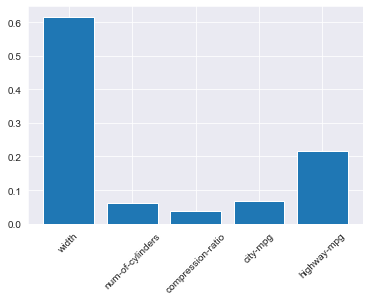

In [24]:
name_col = cars_data.drop(columns = 'rotor').columns
y = pd.Series(data=dtree.feature_importances_, index=name_col)
ind = y[:] == 0
y = y[~ind]
x = range(len(y))
plt.bar(x, y)
plt.xticks(x, y.index,rotation = 45)

In [25]:
y.sort_values()

compression-ratio    0.038998
num-of-cylinders     0.060116
city-mpg             0.068596
highway-mpg          0.215991
width                0.616300
dtype: float64

------
> **Наиболее важные признаки:** width, highway-mpg, city-mpg, num-of-cylinders, compression-ratio

# 3.1. RandomForestClassifier
- Продемонстрировать работу случайного леса RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=8,
                            n_jobs=-1, 
                            random_state=42,
                            )
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
score = cross_val_score(rf, X_train, y_train, cv=5)
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.8807881773399014
Точность на тестовой выборке:  0.8709677419354839


## 3.2. GridSearchCV
С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [27]:
n_estimators = [*range(100, 200, 10)]
max_features = ['auto', 'sqrt']
max_depth = [*range(1, 11, 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:
search = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=random_grid, 
                      scoring=['accuracy'], 
                      n_jobs=-1, 
                      cv=5,
                      verbose=3,
                      refit='accuracy',
                      )
searching_results = search.fit(X_train, y_train)
pridictions = search.predict(X_test)
print(f'Лучшие параметры {search.best_params_}')

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

Лучшие параметры {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}


In [30]:
rf = RandomForestClassifier(n_estimators=130, 
                            max_depth=10,
                            max_features='auto',
                            bootstrap=False,
                            n_jobs=-1, 
                            random_state=42,
                            min_samples_leaf=1,
                            min_samples_split = 2
                            )
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
score = cross_val_score(rf, X_train, y_train, cv=5)
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.9088669950738917
Точность на тестовой выборке:  0.8709677419354839


**Лучший результат дал алгоритм "Random Forest".**

>Средняя точность:  `0.9088669950738917`<br>
Точность на тестовой выборке:  `0.8709677419354839`